In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import riesling as rl
prefix='kernels'
!rm {prefix}*.h5

In [43]:
mat = 80
snr = 50
nchan = 4
recon = f'--toe --sense={prefix}-sense.h5 --sdcPow=0.5 --sdc={prefix}-sdc.h5 --max_its=8'
!riesling phantom {prefix} --shepp_logan --matrix={mat} --snr={snr} --channels={nchan} --os=2.5
!riesling sdc --sdc=pipe {prefix}.h5
!riesling sense-calib --sdc={prefix}-sdc.h5 {prefix}.h5 --fov=256

In [44]:
!riesling cg {recon} --kernel=NN {prefix}.h5 -o {prefix}-NN
!riesling cg {recon} --kernel=KB3 {prefix}.h5 -o {prefix}-KB3
!riesling cg {recon} --kernel=KB4 {prefix}.h5 -o {prefix}-KB4
!riesling cg {recon} --kernel=KB5 {prefix}.h5 -o {prefix}-KB5
!riesling cg {recon} --kernel=KB6 {prefix}.h5 -o {prefix}-KB6


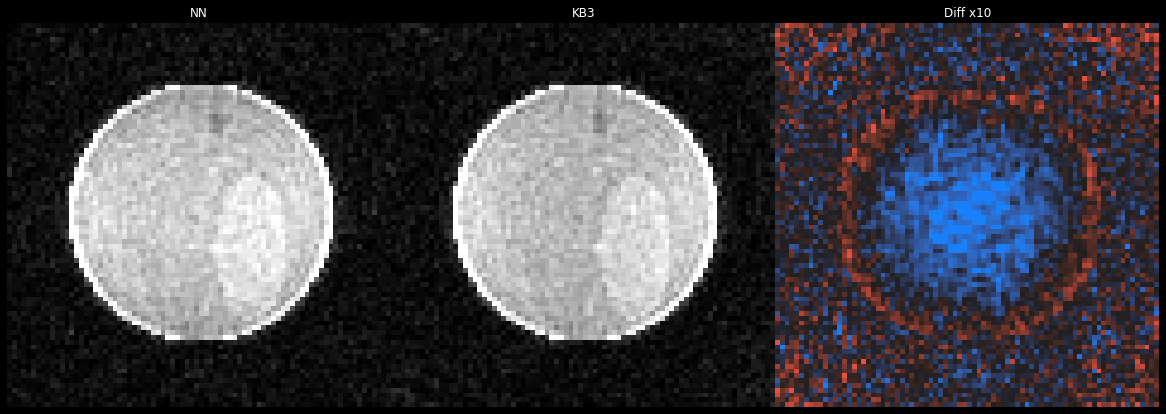

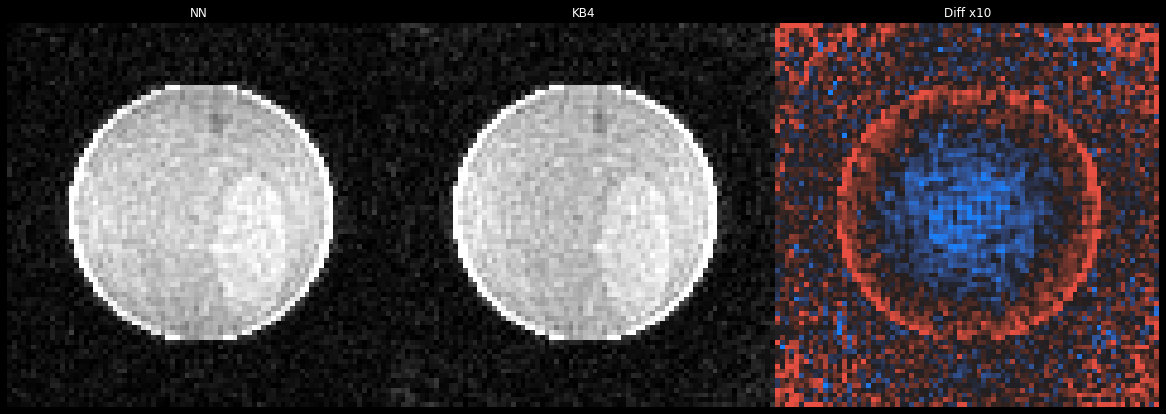

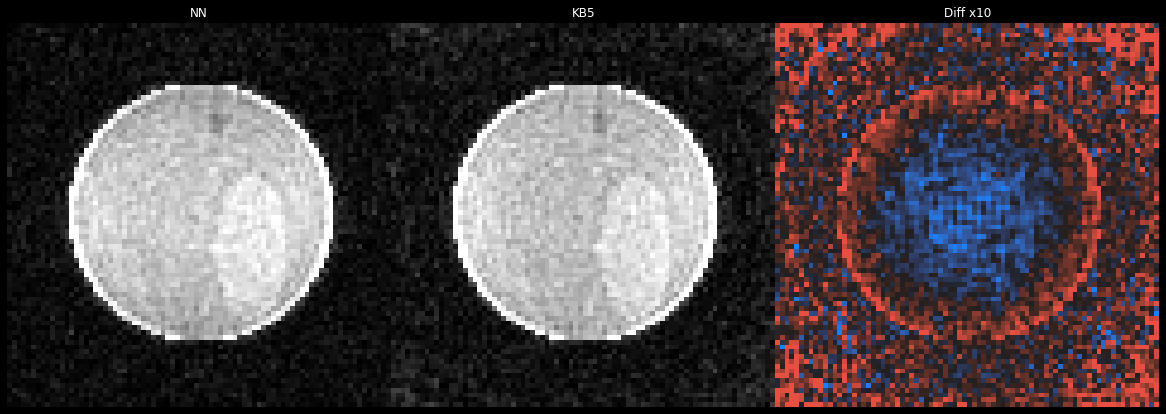

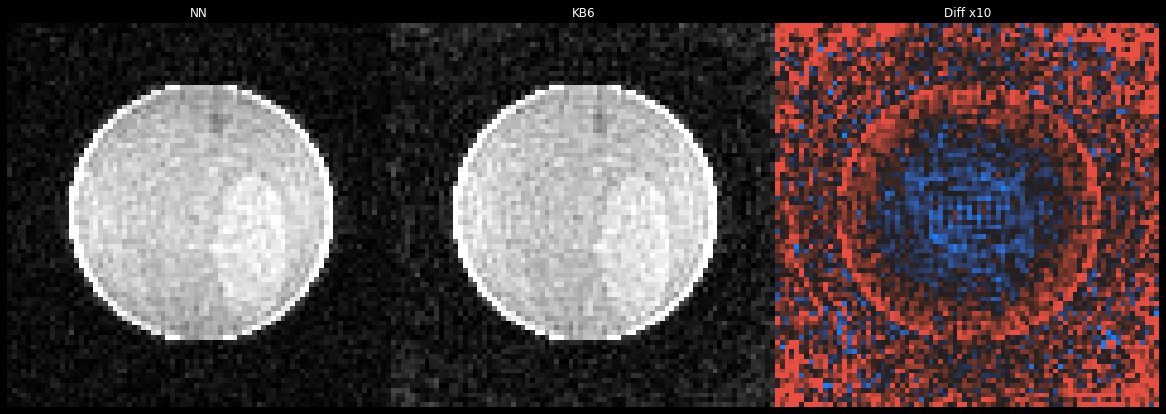

In [45]:
display(rl.images.diff(f'{prefix}-NN-cg.h5', f'{prefix}-KB3-cg.h5', title1='NN', title2='KB3', diffscale=10))
display(rl.images.diff(f'{prefix}-NN-cg.h5', f'{prefix}-KB4-cg.h5', title1='NN', title2='KB4', diffscale=10))
display(rl.images.diff(f'{prefix}-NN-cg.h5', f'{prefix}-KB5-cg.h5', title1='NN', title2='KB5', diffscale=10))
display(rl.images.diff(f'{prefix}-NN-cg.h5', f'{prefix}-KB6-cg.h5', title1='NN', title2='KB6', diffscale=10))

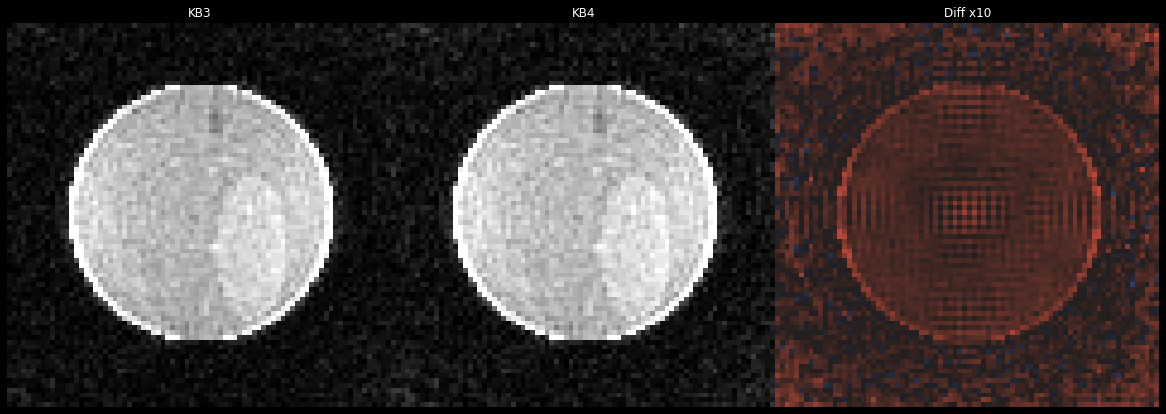

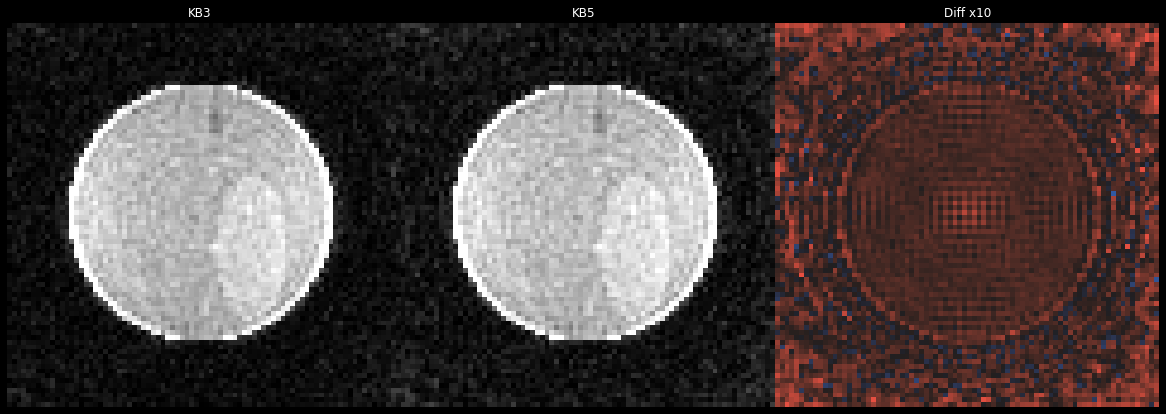

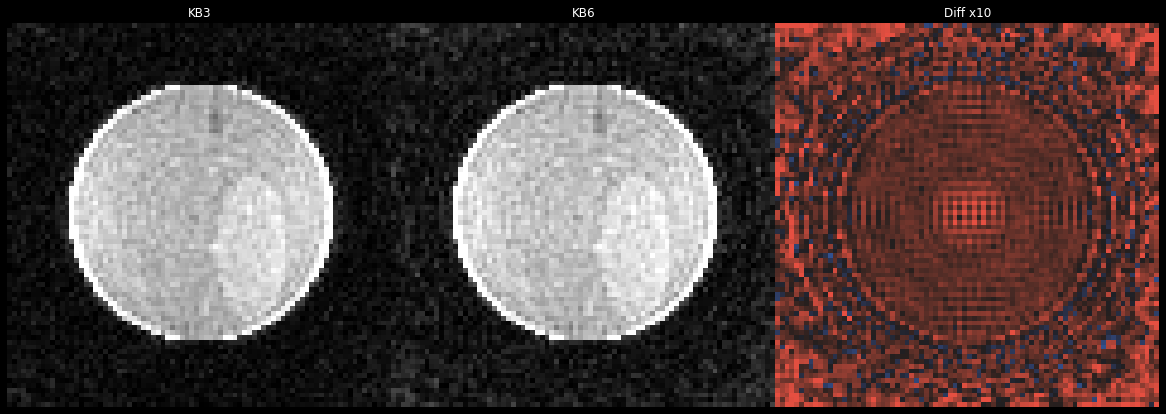

In [46]:
display(rl.images.diff(f'{prefix}-KB3-cg.h5', f'{prefix}-KB4-cg.h5', title1='KB3', title2='KB4', diffscale=10))
display(rl.images.diff(f'{prefix}-KB3-cg.h5', f'{prefix}-KB5-cg.h5', title1='KB3', title2='KB5', diffscale=10))
display(rl.images.diff(f'{prefix}-KB3-cg.h5', f'{prefix}-KB6-cg.h5', title1='KB3', title2='KB6', diffscale=10))

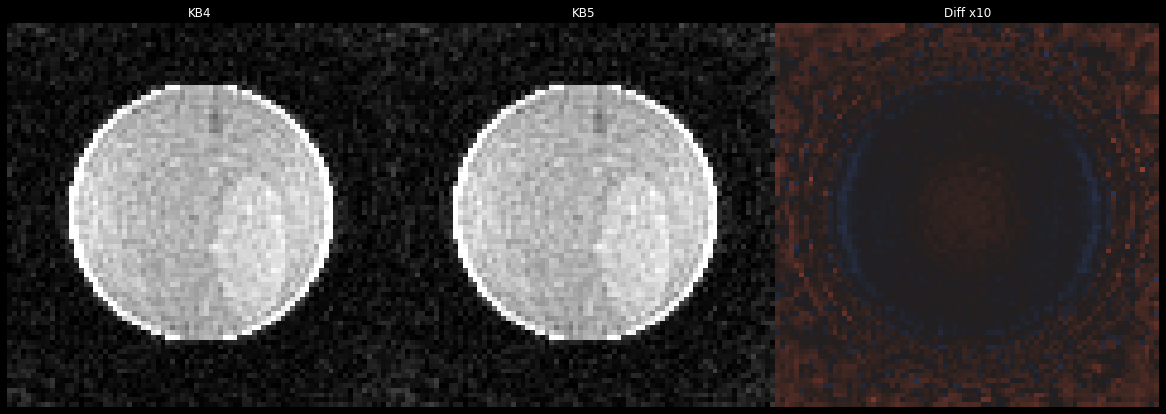

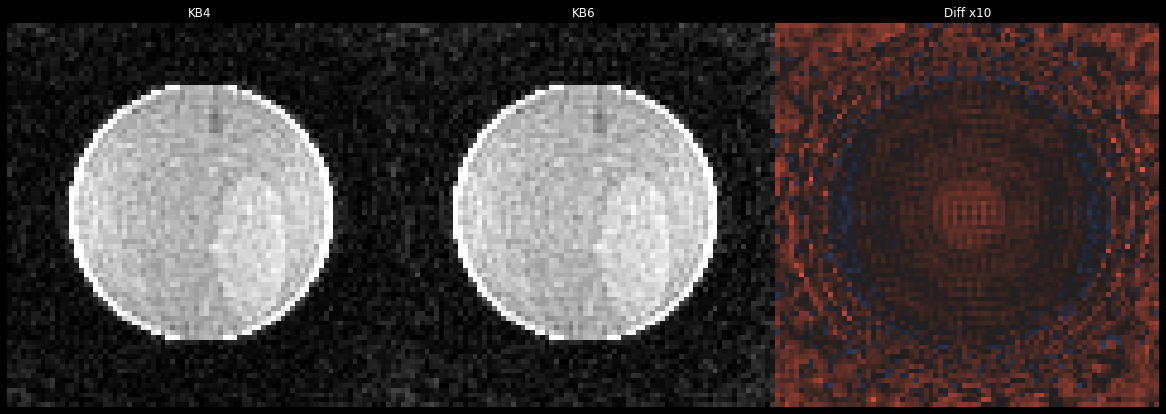

In [47]:
display(rl.images.diff(f'{prefix}-KB4-cg.h5', f'{prefix}-KB5-cg.h5', title1='KB4', title2='KB5', diffscale=10))
display(rl.images.diff(f'{prefix}-KB4-cg.h5', f'{prefix}-KB6-cg.h5', title1='KB4', title2='KB6', diffscale=10))

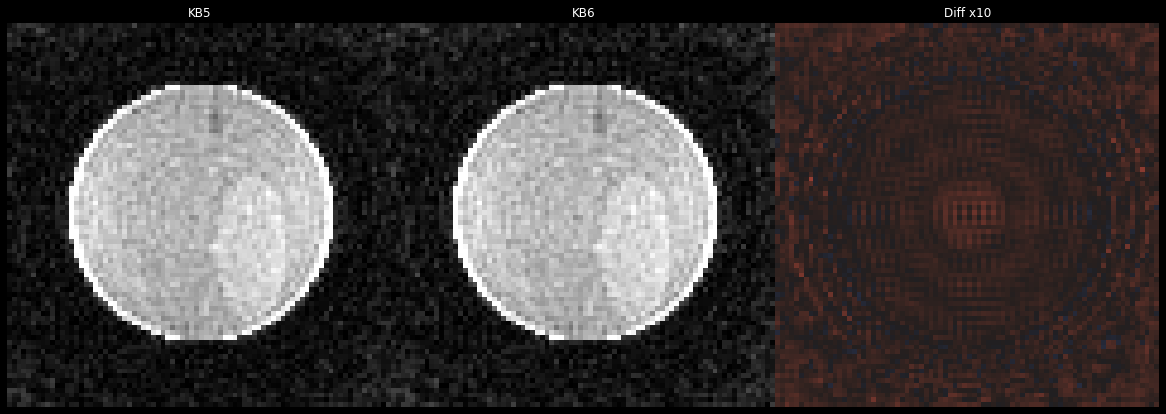

In [48]:
display(rl.images.diff(f'{prefix}-KB5-cg.h5', f'{prefix}-KB6-cg.h5', title1='KB5', title2='KB6', diffscale=10))